# Customer Churn Analysis

**Customer churn** refers to the phenomenon where customers stop doing business with a company or stop using a service. It's a critical metric for businesses, especially those in subscription-based industries, as it directly impacts revenue and growth potential.

Churn rate is calculated with the following formula:



$$ \text{Churn Rate} = \frac{\text{Lost Customers}}{\text{Total Customers at the start period}} \times 100 $$


## Setting up environment

Loading required libraries and setting any up any required variables.

In [119]:
import math

from IPython.display import Markdown, display
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, roc_auc_score

%matplotlib inline
sns.set_style("whitegrid")

## Dataset

Dataset originally from [Kaggle: Customer Churn Prediction](https://www.kaggle.com/datasets/rashadrmammadov*/customer-churn-dataset).

### Column Descriptions

- **customerID**: Unique identifier for each customer.
- **gender**: Gender of the customer *(Male, Female)*.
- **SeniorCitizen**: Whether the customer is a senior citizen or not *(1=Yes, 0=No)*.
- **Partner**: Whether the customer has a partner or not *(Yes, No)*.
- **Dependents**: Whether the customer has dependents or not *(Yes, No)*.
- **tenure**: Number of months the customer has stayed with the company.
- **PhoneService**: Whether the customer has a phone service or not *(Yes, No)*.
- **MultipleLines**: Whether the customer has multiple lines or not *(Yes, No, No phone service)*.
- **InternetService**: Type of internet service the customer has *(DSL, Fiber optic, No)*.
- **OnlineSecurity**: Whether the customer has online security or not *(Yes, No, No internet service)*.
- **OnlineBackup**: Whether the customer has online backup or not *(Yes, No, No internet service)*.
- **DeviceProtection**: Whether the customer has device protection or not *(Yes, No, No internet service)*.
- **TechSupport**: Whether the customer has tech support or not *(Yes, No, No internet service)*.
- **StreamingTV**: Whether the customer has streaming TV or not *(Yes, No, No internet service)*.
- **StreamingMovies**: Whether the customer has streaming movies or not *(Yes, No, No internet service)*.
- **Contract**: The contract term of the customer *(Month-to-month, One year, Two year)*.
- **PaperlessBilling**: Whether the customer has paperless billing or not *(Yes, No)*.
- **PaymentMethod**: The payment method of the customer *(Electronic check, Mailed check, Bank transfer, Credit* card).
- **MonthlyCharges**: The amount charged to the customer monthly.
- **TotalCharges**: The total amount charged to the customer.
- **Churn**: Whether the customer churned or not *(Yes, No)*.


In [7]:
# Load dataset
churn_data = pd.read_csv(r'./data/customer_churn_data.csv')
churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [8]:
# Remove serialized dataset referencing customer id
churn_data = churn_data.drop(['customerID'], axis =1)
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,Male,0,No,No,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [9]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5880 non-null   object 
 1   SeniorCitizen     5880 non-null   int64  
 2   Partner           5880 non-null   object 
 3   Dependents        5880 non-null   object 
 4   tenure            5880 non-null   int64  
 5   PhoneService      5880 non-null   object 
 6   MultipleLines     5880 non-null   object 
 7   InternetService   5880 non-null   object 
 8   OnlineSecurity    5880 non-null   object 
 9   OnlineBackup      5880 non-null   object 
 10  DeviceProtection  5880 non-null   object 
 11  TechSupport       5880 non-null   object 
 12  StreamingTV       5880 non-null   object 
 13  StreamingMovies   5880 non-null   object 
 14  Contract          5880 non-null   object 
 15  PaperlessBilling  5880 non-null   object 
 16  PaymentMethod     5880 non-null   object 


In [10]:
# Data preprocessing
# Handle missing values if any
churn_data.dropna(inplace=True)
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,Male,0,No,No,22,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,No,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [16]:
if churn_data.isnull().sum().sum() == 0:
    display(Markdown("**No missing values found.**"))

**No missing values found.**

### Summary of Categorical Values

In [20]:
categorical_columns = churn_data.select_dtypes(include=['object', 'category']).columns

def process_column(df, col):
    value_counts = df[col].value_counts()
    total = len(df)
    percentages = value_counts / total * 100
    formatted = value_counts.index.map(lambda x: f"{x} ({percentages[x]:.1f}%)")
    return pd.Series(formatted, name=col)

unique_categories = [process_column(churn_data, col) for col in categorical_columns]
sorted_unique_categories = sorted(unique_categories, key=lambda x: (len(x)))

def custom_sort(series, priority_list=['Fiber optic', 'Yes', 'No']):
    # Convert to categorical type with custom ordering
    cat_type = pd.CategoricalDtype(categories=priority_list + [x for x in series.unique() if x not in priority_list], ordered=True)
    return series.astype(cat_type).sort_values().reset_index(drop=True)

unique_df = pd.concat(sorted_unique_categories, axis=1)
unique_df = unique_df.apply(lambda x: x.astype('str').replace("nan", ""))
unique_df = unique_df.apply(custom_sort)
unique_df.T.style.hide(axis='columns').set_caption("<h3>Summary of Categorical Values")


gender,Male (50.2%),Female (49.8%),,
Partner,Yes (50.9%),No (49.1%),,
Dependents,No (51.1%),Yes (48.9%),,
PhoneService,Yes (50.0%),No (50.0%),,
PaperlessBilling,No (50.9%),Yes (49.1%),,
Churn,No (50.7%),Yes (49.3%),,
MultipleLines,No phone service (50.0%),Yes (25.7%),No (24.3%),
InternetService,No (34.5%),DSL (32.9%),Fiber optic (32.6%),
OnlineSecurity,No internet service (34.5%),No (33.1%),Yes (32.4%),
OnlineBackup,No internet service (34.5%),No (33.8%),Yes (31.7%),
DeviceProtection,No internet service (34.5%),Yes (32.8%),No (32.7%),


In [ ]:
cat_features = churn_data.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)
numeric_features = churn_data[['tenure','MonthlyCharges','TotalCharges']]
numeric_features

,tenure,MonthlyCharges,TotalCharges
0,23,49.85,1146.55
1,43,100.70,4330.10
2,51,97.33,4963.83
3,72,101.38,7299.36
4,25,52.22,1305.50
...,...,...,...
5875,71,74.21,5268.91
5876,22,65.43,1439.46
5877,68,59.78,4065.04
5878,14,91.88,1286.32


In [280]:
def countplot(df, columns, group_by=None):
    ncols=3
    nrows=math.ceil(len(columns) / ncols)
    fig_size = (ncols * 6, nrows * 3)
    gap = 0.4, 0.2

    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=fig_size)
    fig.subplots_adjust(hspace=gap[0], wspace=gap[1])
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        sns.countplot(x=col, data=df, hue=group_by, ax=ax)
        ax.set_title(f'{col}')
        if group_by:
            ax.legend_.remove()
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(left=False, bottom=False)

        # Calculate total counts and percentages
        total_counts = df[col].value_counts().sum()

        # Set y-axis ticks distance
        ax.yaxis.set_major_locator(MultipleLocator(500))

        # Add values to each bar
        for p in ax.patches:
            height = p.get_height()
            if height > 0:  
                percentage = 100 * height / total_counts
                ax.annotate(f'{percentage:.0f}%',
                            (p.get_x() + p.get_width() / 2., p.get_height()),  # top
                            ha='center', va='center',
                            xytext=(0, -12),
                            color='white',
                            fontsize=12,
                            textcoords='offset points',
                            )

        # Add headroom by increasing the y-axis limit
        ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

    plt.show()

### Churn Distribution

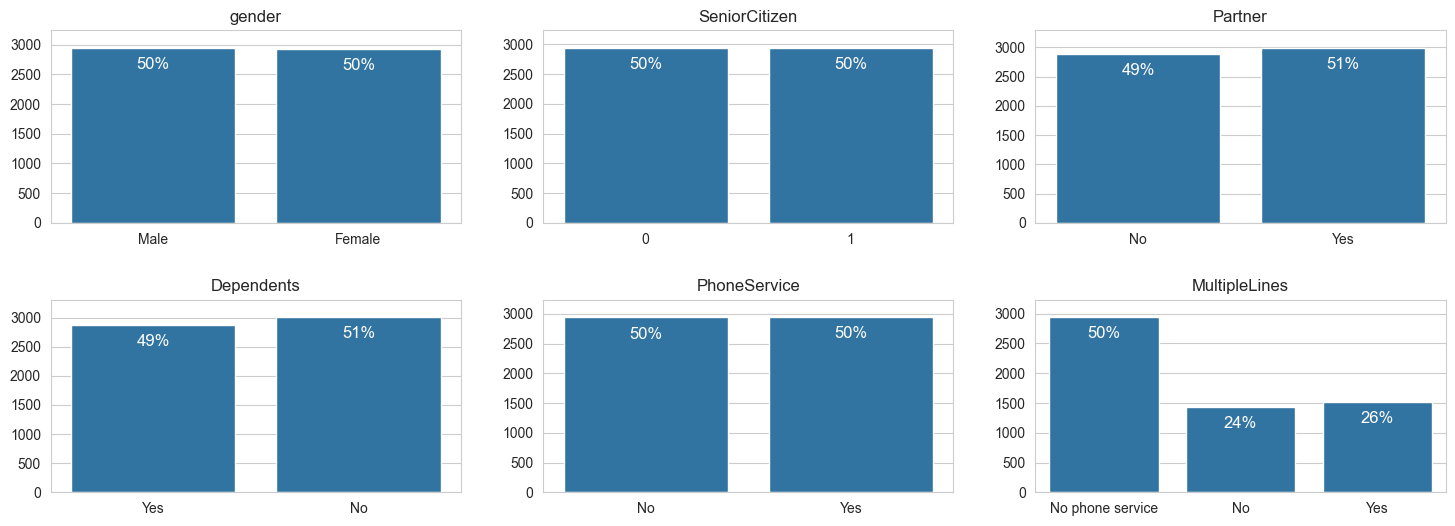

In [285]:
cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines"]
countplot(churn_data, cols)

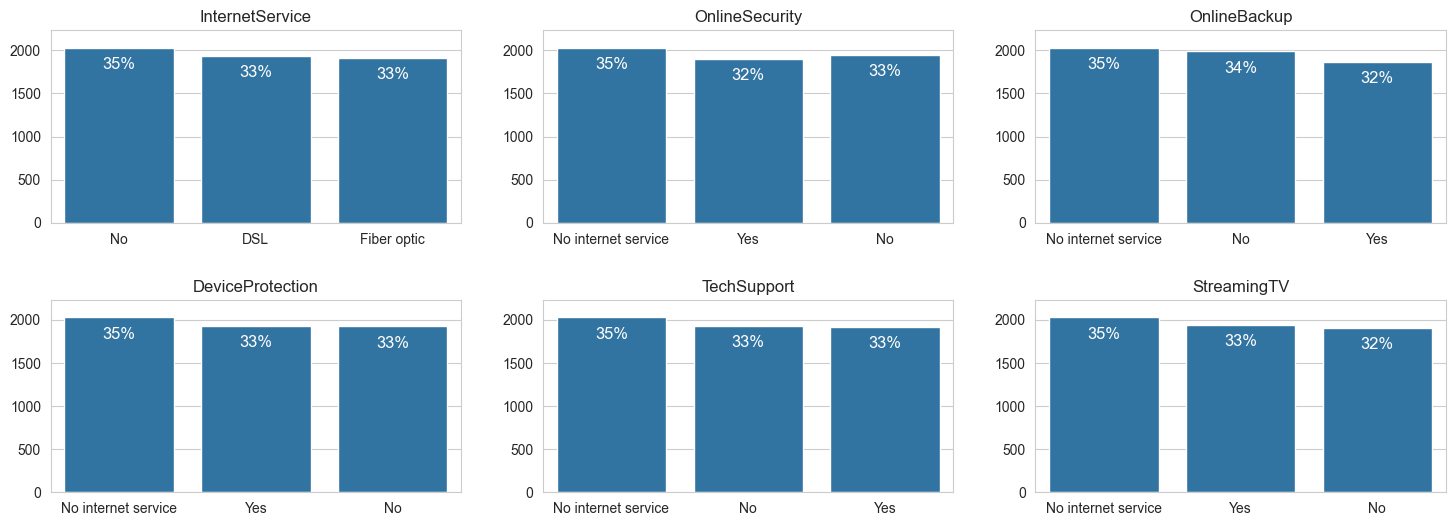

In [290]:
cols = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV"]
countplot(churn_data, cols)

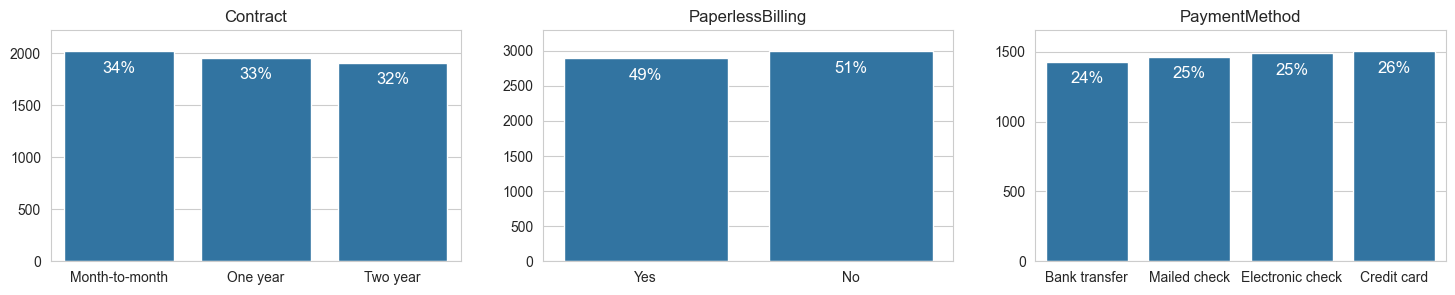

In [292]:
cols = ["Contract", "PaperlessBilling", "PaymentMethod"]
countplot(churn_data, cols)

### Churn Distribution by Categorical Features

<div style="display: flex; align-items: center; margin-bottom: 10px;">
  <div style="width: 20px; height: 20px; background-color: #1f77b4; margin-right: 5px;"></div>
  <span style="margin-right: 15px;">No Churn</span>
  <div style="width: 20px; height: 20px; background-color: #ff7f0e; margin-right: 5px;"></div>
  <span>Churn</span>
</div>

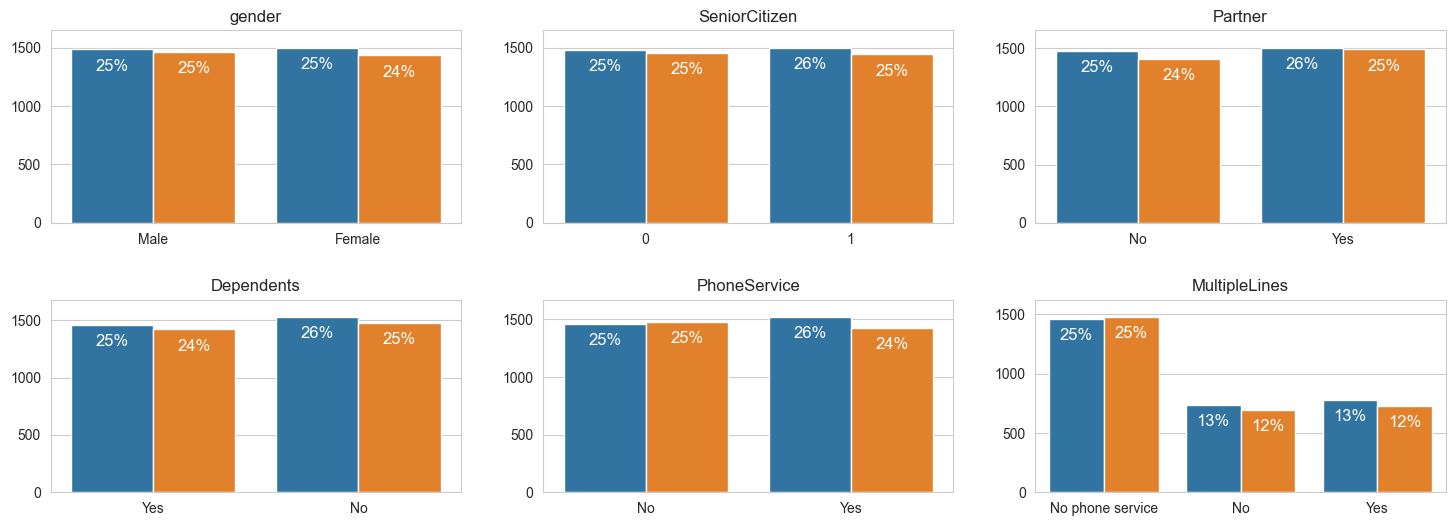

In [ ]:
cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines"]
countplot(churn_data, cols, group_by='Churn')

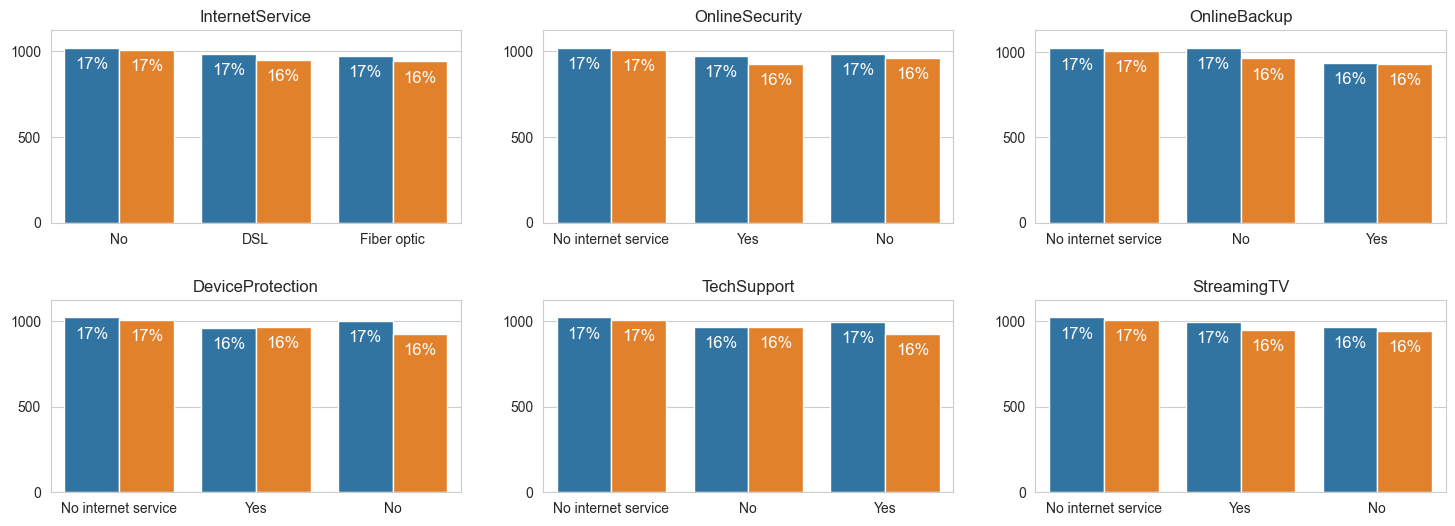

In [288]:
cols = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV"]
countplot(churn_data, cols, group_by='Churn')

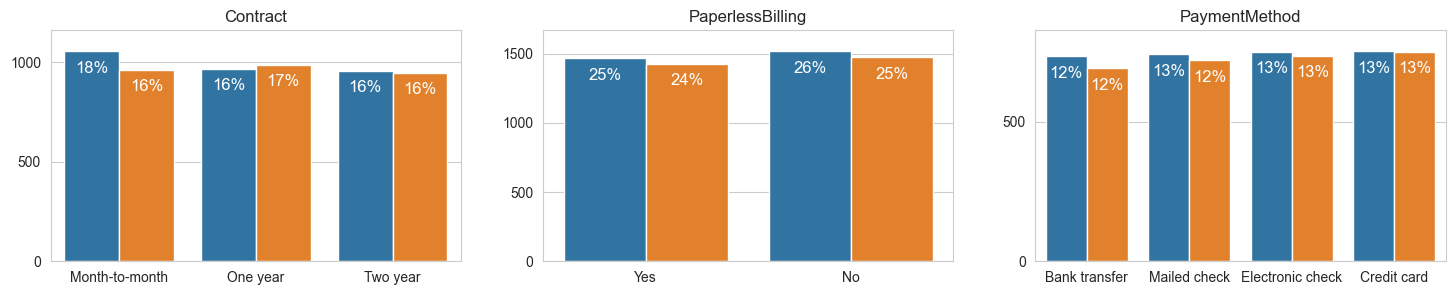

In [289]:
cols = ["Contract", "PaperlessBilling", "PaymentMethod"]
countplot(churn_data, cols, group_by='Churn')

### Distribution of Quantitative Features

In [52]:
def histplot(churn_data, col):
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.histplot(data=churn_data, x=col, kde=True, ax=ax)
    
    mean_val = churn_data[col].mean()
    median_val = churn_data[col].median()
    
    ax.axvline(mean_val, color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(median_val, color='cyan', linestyle='dashed', linewidth=2, label='Median')
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax.tick_params(left=False, bottom=False)
    ax.legend()
    
    plt.tight_layout()
    plt.show()


#### Tenure (Months)

Customers are usually with the company for around 3 years.

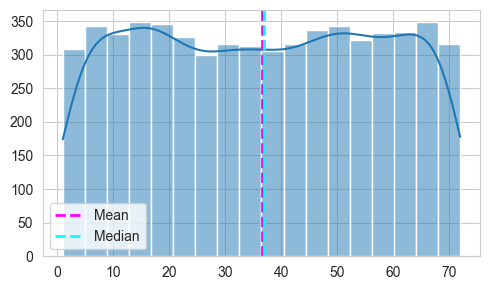

In [53]:
display(Markdown("#### Tenure (Months)"))
display(Markdown("Customers are usually with the company for around 3 years."))
histplot(churn_data, 'tenure')

#### Monthly Charges (USD)

Customers are usually charged around 75$ per month.

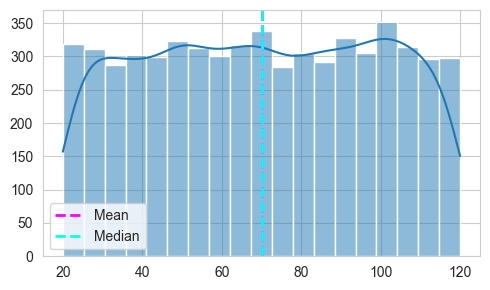

In [54]:
display(Markdown("#### Monthly Charges (USD)"))
display(Markdown("Customers are usually charged around 75$ per month."))
histplot(churn_data, 'MonthlyCharges')

#### Total Charges (USD)

Usually, customers spend around 2000 USD during their stay with company.

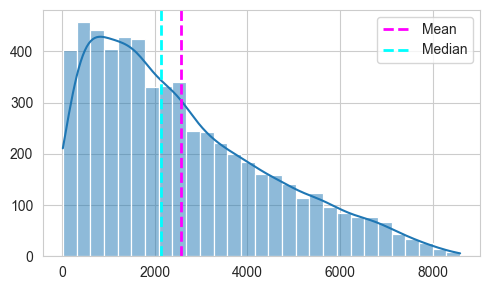

In [55]:
display(Markdown("#### Total Charges (USD)"))
display(Markdown("Usually, customers spend around 2000 USD during their stay with company."))
histplot(churn_data, 'TotalCharges')

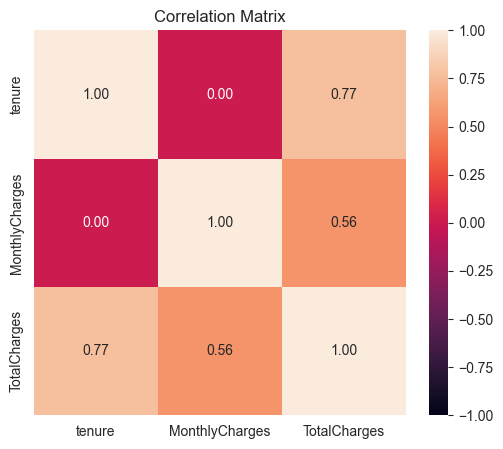

In [264]:
# Calculate correlation matrix
corr_matrix = numeric_features.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

### Mean normalization (min-max scaling)

It is important to normalize mean values in order to run effective machine learning models later on.

A `Min-Max Scaling` is typically done via the foloowing equation:

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset.


We have three columns that neeed to be normalized due to them having too big of a range:

- **tenure** - displays number of months the customer has stayed with the company,
- **MonthlyCharges** - displays the amount charged to the customer monthly,
- **TotalCharges** - The total amount charged to the customer.


In [56]:
scaler = MinMaxScaler()
Scaled_Numeric_features = scaler.fit_transform(numeric_features)
Norm_numeric_features = pd.DataFrame(Scaled_Numeric_features, columns = numeric_features.columns)
Norm_churn_data = pd.concat([Norm_numeric_features, cat_features], axis=1)
Norm_churn_data.head()

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.309859,0.298530,0.131456,Male,0,No,Yes,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,No
1,0.591549,0.807081,0.502951,Female,0,Yes,No,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,Yes
2,0.704225,0.773377,0.576902,Male,1,No,No,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,Yes
3,1.000000,0.813881,0.849439,Male,1,No,No,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,No
4,0.338028,0.322232,0.150004,Male,1,No,No,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,Yes


In [ ]:
Norm_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            5880 non-null   float64
 1   MonthlyCharges    5880 non-null   float64
 2   TotalCharges      5880 non-null   float64
 3   gender            5880 non-null   object 
 4   SeniorCitizen     5880 non-null   int64  
 5   Partner           5880 non-null   object 
 6   Dependents        5880 non-null   object 
 7   PhoneService      5880 non-null   object 
 8   MultipleLines     5880 non-null   object 
 9   InternetService   5880 non-null   object 
 10  OnlineSecurity    5880 non-null   object 
 11  OnlineBackup      5880 non-null   object 
 12  DeviceProtection  5880 non-null   object 
 13  TechSupport       5880 non-null   object 
 14  StreamingTV       5880 non-null   object 
 15  StreamingMovies   5880 non-null   object 
 16  Contract          5880 non-null   object 


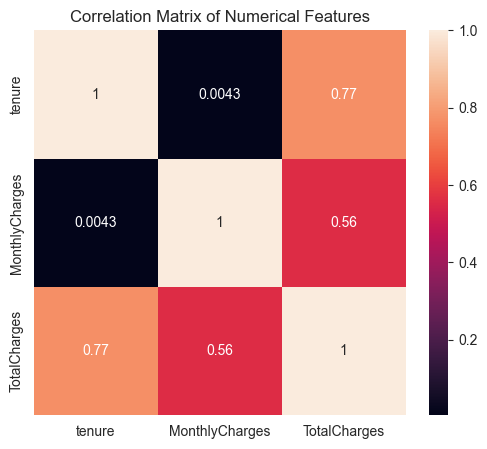

In [265]:
# Correlation matrix
numerical_features = Norm_churn_data.select_dtypes(include=['float64'])
corr_matrix = numerical_features.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 10}) 
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Interpretation Correlation 

Total Charges and Tenure:

Correlation Coefficient: 0.77

Explanation: There is a strong positive correlation between Total Charges and Tenure. This means that as the customer's tenure increases, their Total Charges also tend to increase significantly. This is expected because the longer a customer stays with the service, the more they are billed over time, leading to higher total charges.

Total Charges and Monthly Charges:

Correlation Coefficient: 0.0043

Explanation: There is a moderate positive correlation between Total Charges and Monthly Charges. This suggests that customers who pay higher monthly charges tend to have higher total charges, although this relationship is not as strong as that with tenure. This indicates that both higher monthly rates and longer service duration contribute to increased total charges.

Monthly Charges and Tenure:

Correlation Coefficient: 0.0043

Explanation: There is virtually no correlation between Monthly Charges and Tenure. This indicates that the monthly amount charged to customers does not vary significantly with the length of time they have been customers. Customers' monthly charges remain relatively stable regardless of how long they have been with the service.


In [90]:
# Separate response and predictor variables
X = Norm_churn_data.drop('Churn', axis=1)
y = Norm_churn_data['Churn']

In [91]:
X = pd.get_dummies(X)
X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.309859,0.298530,0.131456,0,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,0.591549,0.807081,0.502951,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0.704225,0.773377,0.576902,1,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,1.000000,0.813881,0.849439,1,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0.338028,0.322232,0.150004,1,0,1,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0


### Training a logistic regression model

In [92]:
# Split data 70% - 30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
modellr = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
modellr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [95]:
# Step 6: Predictions and model evaluation
y_pred = modellr.predict(X_test)

### Logistic regression model evaluation

**<h3> Confusion Matrix and Classification Report

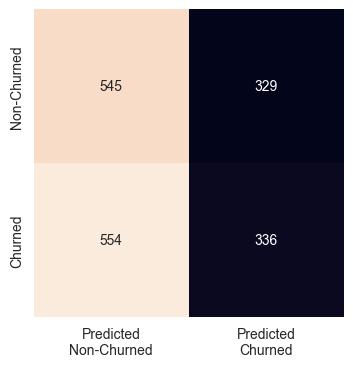

,precision,recall,f1-score,support
No,0.50,0.62,0.55,874.00
Yes,0.51,0.38,0.43,890.00
accuracy,0.50,0.50,0.50,0.50
macro avg,0.50,0.50,0.49,1764.00
weighted avg,0.50,0.50,0.49,1764.00


**Model accuracy**: 0.50

In [106]:
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)

display(Markdown(f'**<h3> Confusion Matrix and Classification Report'))

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Predicted\nNon-Churned', 'Predicted\nChurned'],
            yticklabels=['Non-Churned', 'Churned'],
            cbar=False,
            annot_kws={"size": 10})

# Set title and labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

display(pd.DataFrame(cr).T.style.format(precision=2))
Markdown(f'**Model accuracy**: {accuracy:.2f}')


### Training a Random Forest model

In [107]:
# Using a classification model
# Encode categorical variables if needed

le = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = le.fit_transform(X[col])

In [108]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [109]:
# train the model (Random Forest Classifier)
modelrfc = RandomForestClassifier(random_state=42)
modelrfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###  Random Forest model evaluation

In [111]:
y_pred = modelrfc.predict(X_test)

**<h3> Confusion Matrix and Classification Report

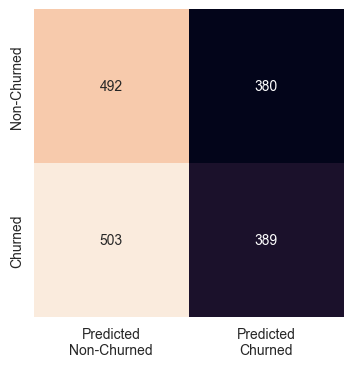

,precision,recall,f1-score,support
No,0.49,0.56,0.53,872.00
Yes,0.51,0.44,0.47,892.00
accuracy,0.50,0.50,0.50,0.50
macro avg,0.50,0.50,0.50,1764.00
weighted avg,0.50,0.50,0.50,1764.00


**Model accuracy**: 0.50

In [114]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)

display(Markdown(f'**<h3> Confusion Matrix and Classification Report'))

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Predicted\nNon-Churned', 'Predicted\nChurned'],
            yticklabels=['Non-Churned', 'Churned'],
            cbar=False,
            annot_kws={"size": 10})

# Set title and labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

display(pd.DataFrame(cr).T.style.format(precision=2))
Markdown(f'**Model accuracy**: {accuracy:.2f}')


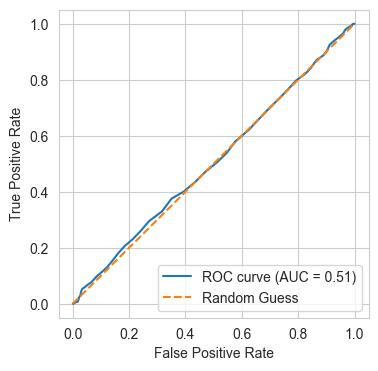

**ROC-AUC Score**: 0.51

In [136]:
y_test_encoded = np.where(y_test == 'Yes', 1, 0)
roc_auc = roc_auc_score(y_test, y_prob)

y_prob = modelrfc.predict_proba(X_test)[:, 1]  # Probability predictions for class 1
fpr, tpr, _ = sklearn.metrics.roc_curve(y_test_encoded, y_prob)
roc_auc = sklearn.metrics.auc(fpr, tpr)

plt.figure(figsize=(4, 4))
sns.lineplot(x=fpr, y=tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()

Markdown(f'**ROC-AUC Score**: {roc_auc:.2f}')

The ROC-AUC score is a measure of a model's ability to distinguish between classes, in this case, between customers who will churn and those who will not churn.

 A score of 0.51 is only marginally better than 0.5, indicating that the model has very little ability to correctly classify customers into churn and non-churn categories. It’s almost as ineffective as random guessing.

In [143]:
# Feature importances for Random forest classifiers
feature_importances = modelrfc.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

<h3> Most 20 important features

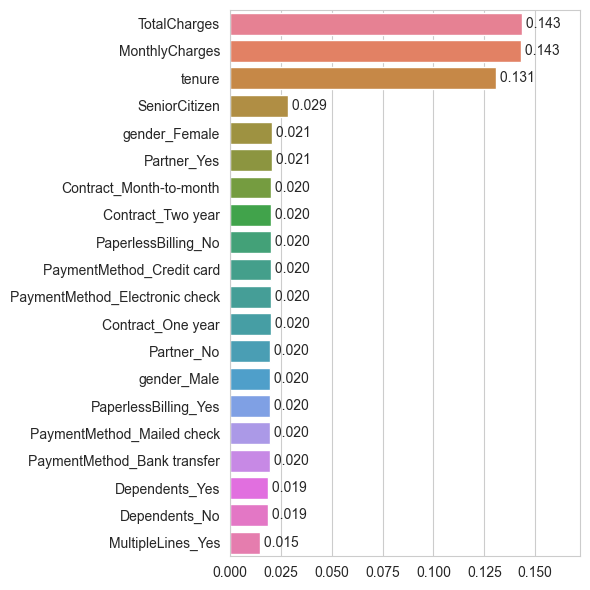

In [212]:
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)
plt.figure(figsize=(6, 6))

ax = sns.barplot(x='Importance', y='Feature', data=top_features, hue='Feature')

ax.set_xlabel('')
ax.set_ylabel('')

for i, v in enumerate(top_features['Importance']):
    ax.text(v, i, f' {v:.3f}', va='center')

# Add headroom to x-axis
x_max = top_features['Importance'].max()
plt.xlim(0, x_max * 1.2) 

plt.tight_layout()
display(Markdown(f'<h3> Most 20 important features'))
plt.show()

In [220]:
# Feature importances for Logistic Regression Model
coefficients = modellr.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)
pd.DataFrame(feature_importance).style.set_caption("<h3>Feature Importance (Coefficients)").hide(axis=1).bar()

tenure,0.047903
DeviceProtection_Yes,0.029062
TechSupport_No,0.027799
Contract_Two year,0.023920
PaymentMethod_Mailed check,0.021103
OnlineSecurity_No,0.019965
Partner_Yes,0.018600
MonthlyCharges,0.017733
PaymentMethod_Electronic check,0.013079
StreamingMovies_No,0.010006
Dependents_Yes,0.009823


The feature importance coefficients reveal the impact of various factors on customer churn. Positive coefficients, like tenure (0.048) and DeviceProtection_Yes (0.029), indicate that these features reduce the likelihood of churn. Negative coefficients, such as TotalCharges (-0.035) and DeviceProtection_No (-0.033), suggest these factors increase the likelihood of churn. Factors like Contract_Two year (0.024) and PaymentMethod_Mailed check (0.021) are associated with lower churn rates, while PaymentMethod_Bank transfer (-0.027) and Contract_Month-to-month (-0.031) correlate with higher churn. Overall, features related to service quality, payment methods, and contract types significantly influence customer retention.

In [228]:
# Encode Features to improve model accuracy
# Separate features (X) and target variable (y)
X = Norm_churn_data.drop('Churn', axis=1)  # Features
y = Norm_churn_data['Churn']  # Target variable

# One-Hot Encoding of categorical features
X_encoded = pd.get_dummies(X)

display(Markdown(("<h3>Encoded Features")))
X_encoded.head()

<h3>Encoded Features

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.309859,0.298530,0.131456,0,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,0.591549,0.807081,0.502951,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
2,0.704225,0.773377,0.576902,1,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,1.000000,0.813881,0.849439,1,0,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0.338028,0.322232,0.150004,1,0,1,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Shapes of datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")#

Shapes of datasets:
X_train: (4116, 45), y_train: (4116,)
X_test: (1764, 45), y_test: (1764,)


In [233]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

cr = classification_report(y_test, y_pred, output_dict=True)

display(Markdown(f'**<h3> Confusion Matrix and Classification Report'))
display(pd.DataFrame(cr).T.style.format(precision=2))
Markdown(f'**Model accuracy**: {accuracy:.2f}')

**<h3> Confusion Matrix and Classification Report

,precision,recall,f1-score,support
No,0.48,0.60,0.53,872.00
Yes,0.48,0.37,0.42,892.00
accuracy,0.48,0.48,0.48,0.48
macro avg,0.48,0.48,0.48,1764.00
weighted avg,0.48,0.48,0.48,1764.00


**Model accuracy**: 0.48

#### Label Encoding

Label encoding serves the same purpose as mean normalization, which is present data in numeric values to algorithm to run it efficiently.  
In the code below, we are going to map binary values to 1 and 0 respectively.

In [234]:
# Separate features (X) and target variable (y)
X = Norm_churn_data.drop('Churn', axis=1)  # Features
y = Norm_churn_data['Churn']  # Target variable

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
X_encoded = X.apply(label_encoder.fit_transform)

# Display the encoded features
display(Markdown(("<h3>Encoded Features")))
X_encoded.head()

<h3>Encoded Features

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,22,1302,1602,1,0,0,1,0,1,2,1,1,1,1,1,1,0,1,0
1,42,3579,4691,0,0,1,0,0,1,0,2,0,2,0,2,0,0,0,3
2,50,3423,5007,1,1,0,0,1,0,0,0,2,2,2,0,0,1,0,2
3,71,3614,5698,1,1,0,0,1,2,0,2,0,2,0,0,0,0,0,1
4,24,1425,1832,1,1,0,0,1,2,0,0,0,0,2,0,2,0,0,2


In [235]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

cr = classification_report(y_test, y_pred, output_dict=True)

display(Markdown(f'**<h3> Confusion Matrix and Classification Report'))
display(pd.DataFrame(cr).T.style.format(precision=2))
Markdown(f'**Model accuracy**: {accuracy:.2f}')

/x/1_projects/dsi/python/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**<h3> Confusion Matrix and Classification Report

,precision,recall,f1-score,support
No,0.49,0.61,0.54,874.00
Yes,0.49,0.36,0.42,890.00
accuracy,0.49,0.49,0.49,0.49
macro avg,0.49,0.49,0.48,1764.00
weighted avg,0.49,0.49,0.48,1764.00


**Model accuracy**: 0.49

Conclusion on Using Synthetic Data for Telecom Customer Churn 

Data Analysis:

Performance Summary: The model trained on synthetic data shows poor performance with an overall accuracy of 0.49, indicating it is only slightly better than random guessing. The precision, recall, and F1-scores are low for both churn and non-churn predictions, suggesting that the model struggles to distinguish between the two classes effectively.

Actions for Real Telecom Customer Churn Prediction:

Enhance Data Quality:

Real Data Collection: Use real customer data for training the model to capture genuine patterns and behaviors.
Data Cleaning: Ensure the data is clean, free of errors, and inconsistencies.

Feature Engineering:

Identify Relevant Features: Include additional features such as customer service interactions, payment history, and usage pattern

Customer Retention Strategies:

Personalized Offers: Use predictive insights to offer personalized discounts and promotions to at-risk customers.

Improve Customer Service: Enhance customer service quality and responsiveness to address customer issues promptly.

Loyalty Programs: Implement loyalty programs to reward long-term customers and encourage retention.
Feedback Mechanisms: Regularly collect and analyze customer feedback to identify and address pain points.

By focusing on real data, feature engineering, model improvement, and targeted retention strategies, the company can develop a more accurate and effective churn prediction model and retain more customers.